# 1.4c Introduction to TensorFlow (with millions of points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#### The steps are identical to ./L1-4b__TensorFlow_intro.ipynb except we have one million times as many features and labels...

In [2]:
xs = np.linspace(0., 8., 8000000) # eight million points spaced evenly over the interval zero to eight
ys = 0.3*xs-0.8+np.random.normal(scale=0.25, size=len(xs)) # 8 million labels given xs, m=0.3, b=-0.8, and noise

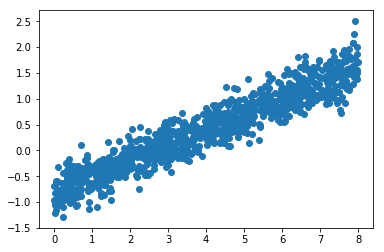

In [8]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns=['x', 'y']).sample(n=1000, replace=True)
ax.scatter(data_subset.x, data_subset.y)

In [9]:
m_initial = -0.5
b_initial = 1.0

In [10]:
m = tf.Variable(m_initial)
b = tf.Variable(b_initial)

#### ...we define *placeholders* (typically *inputs* or *labels*) -- whose values will be filled in during graph execution...

In [11]:
_BATCH = 8 # use only eight points at a time; we'll discuss this in detail in Lesson 2
xs_placeholder = tf.placeholder(tf.float32, [_BATCH])
ys_placeholder = tf.placeholder(tf.float32, [_BATCH])

#### ...so model and error are defined with placeholders...

In [12]:
ys_model = m*xs_placeholder+b
total_error = tf.reduce_sum((ys_placeholder-ys_model)**2) 

In [13]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 

In [14]:
initializer_operation = tf.global_variables_initializer()

#### ...and within the session we sample from the full data set

In [20]:
with tf.Session() as session:

    session.run(initializer_operation) 
    
    _EPOCHS = 1 # Increase the number of epochs from 1 to 10k! 
    for iteration in range(_EPOCHS):
        random_indices = np.random.randint(len(xs), size=_BATCH) # Sample batches of the data at random...
        feed = { 
            xs_placeholder: xs[random_indices], # ...and feed the batches into the placeholders...
            ys_placeholder: ys[random_indices]
        }
        session.run(optimizer_operation, feed_dict=feed) # ...adding the feed_dict parameter to the run call
    
    slope, intercept = session.run((m, b)) 
    print('Slope:', slope, 'Intercept:', intercept)

Slope: -0.271969 Intercept: 1.03191
